In [2]:
#Task: Cuisine Combination

#Identify the most common combinations of cuisines in the dataset.

#Determine if certain cuisine combinations tend to have higher ratings.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df_cuisine = df.copy()

# Remove missing values
df_cuisine = df_cuisine.dropna(subset=['Cuisines'])


In [6]:
cuisine_counts = df_cuisine['Cuisines'].value_counts()
top_combinations = cuisine_counts.head(10)

top_combinations


Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [7]:
combo_table = pd.DataFrame({
    "Cuisine Combination": top_combinations.index,
    "Number of Restaurants": top_combinations.values
})

combo_table


,Cuisine Combination,Number of Restaurants
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


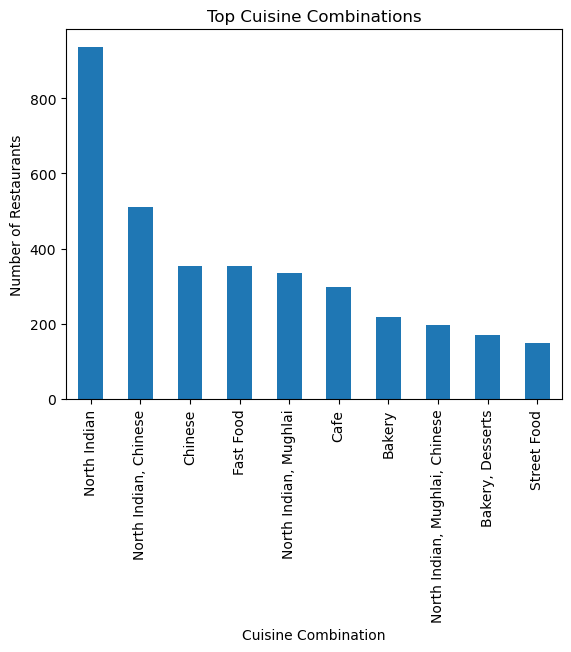

In [13]:
plt.figure()
top_combinations.plot(kind='bar')
plt.title("Top Cuisine Combinations")
plt.xlabel("Cuisine Combination")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=90)
plt.show()


In [9]:
avg_rating_combo = df_cuisine.groupby('Cuisines')['Aggregate rating'].mean()

top_rating_combo = avg_rating_combo.sort_values(ascending=False).head(10)

top_rating_combo


Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64

In [12]:
rating_combo_table = pd.DataFrame({
    "Cuisine Combination": top_rating_combo.index,
    "Average Rating": top_rating_combo.values.round(2)
})

rating_combo_table


,Cuisine Combination,Average Rating
0,"Italian, Deli",4.9
1,"Hawaiian, Seafood",4.9
2,"American, Sandwich, Tea",4.9
3,"Continental, Indian",4.9
4,"European, Asian, Indian",4.9
5,"European, Contemporary",4.9
6,"European, German",4.9
7,"BBQ, Breakfast, Southern",4.9
8,"American, Coffee and Tea",4.9
9,"Sunda, Indonesian",4.9


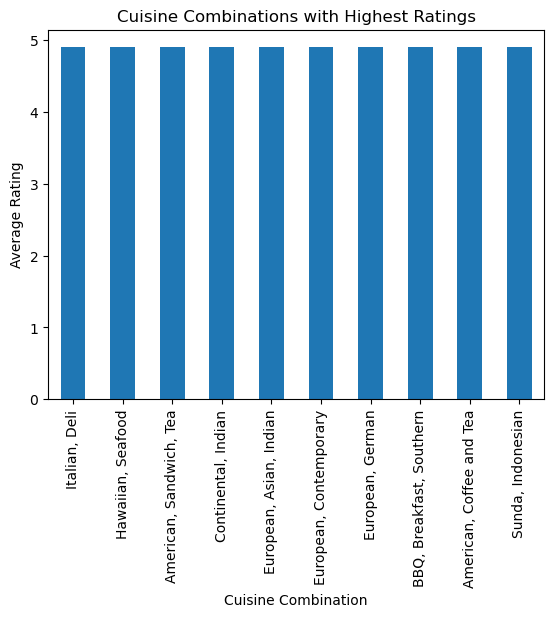

In [14]:
plt.figure()
top_rating_combo.plot(kind='bar')
plt.title("Cuisine Combinations with Highest Ratings")
plt.xlabel("Cuisine Combination")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()
